In [76]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm

In [77]:
fx_pairs = [
    "AUDCAD=X", "AUDCHF=X", "AUDJPY=X", "AUDNZD=X", "AUDUSD=X", 
    "CADCHF=X", "CADJPY=X", "CADMXN=X", "CHFHUF=X", "CHFJPY=X",
    "CHFNOK=X", "CHFPLN=X", "CHFSEK=X", "EURAUD=X", "EURCAD=X", 
    "EURCHF=X", "EURCNH=X", "EURCZK=X", "EURGBP=X", "EURHUF=X", 
    "EURJPY=X", "EURMXN=X", "EURNOK=X", "EURNZD=X", "EURPLN=X", 
    "EURRON=X", "EURRUB=X", "EURSEK=X", "EURSGD=X", "EURTRY=X", 
    "EURUSD=X", "EURZAR=X", "GBPAUD=X", "GBPCAD=X", "GBPCHF=X", 
    "GBPJPY=X", "GBPMXN=X", "GBPNOK=X", "GBPNZD=X", "GBPPLN=X", 
    "GBPSEK=X", "GBPSGD=X", "GBPUSD=X", "GBPZAR=X", "NOKSEK=X", 
    "NZDCAD=X", "NZDJPY=X", "NZDSGD=X", "NZDUSD=X", "USDBRL=X", 
    "USDCAD=X", "USDCHF=X", "USDCLP=X", "USDCNH=X", "USDCZK=X", 
    "USDHUF=X", "USDILS=X", "USDINR=X", "USDJPY=X", "USDMXN=X", 
    "USDNOK=X", "USDPLN=X", "USDRON=X", "USDRUB=X", "USDSEK=X", 
    "USDSGD=X", "USDTHB=X", "USDTRY=X", "USDZAR=X", "ZARJPY=X"
]

In [78]:
def get_fx_data(symbol, period="1y"):
    fx_data = yf.download(symbol, period=period)
    fx_data = fx_data['Close']
    return fx_data

# Augmented Dickey-Fuller (ADF) Test for Stationarity
def adf_test(prices):
    result = adfuller(prices.dropna())
    return result[0], result[1], result[4]  # ADF Statistic, p-value, critical values

# Ornstein-Uhlenbeck Process (Half-Life Calculation)
def calculate_half_life(prices):
    prices_lagged = prices.shift(1).fillna(method="bfill")
    delta_prices = prices - prices_lagged
    model = sm.OLS(delta_prices, sm.add_constant(prices_lagged)).fit()
    lambda_param = -model.params[1]
    half_life = np.log(2) / lambda_param
    return half_life

# Plot the price data with moving average
def plot_mean_reversion(prices, symbol):
    plt.figure(figsize=(12, 6))
    plt.plot(prices, label="Price", color="blue")
    plt.plot(prices.rolling(window=30).mean(), label="30-day SMA", color="orange", linestyle="--")
    plt.title(f"{symbol} Price Series with Mean Reversion Indicator")
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.legend()
    plt.show()

In [79]:
def mean_reverting_pairs(fx_pairs):
    results = []

    for symbol in fx_pairs:
        try:
            prices = get_fx_data(symbol)
            
            # Skip if no data
            if prices.empty:
                continue

            # Augmented Dickey-Fuller (ADF) Test
            adf_stat, p_value, crit_values = adf_test(prices)
            mean_reverting = p_value < 0.05

            # Ornstein-Uhlenbeck Process Half-Life Calculation
            half_life = calculate_half_life(prices) if mean_reverting else None
            
            # Store only mean-reverting pairs
            if mean_reverting:
                results.append({
                    "Currency Pair": symbol,
                    "ADF Statistic": adf_stat,
                    "p-value": p_value,
                    "Half-Life (days)": half_life
                })
                plot_mean_reversion(prices, symbol)

        except ValueError as e:
            print(f"Skipping {symbol}: {e}")
        except Exception as e:
            print(f"Unexpected error for {symbol}: {e}")

    results_df = pd.DataFrame(results)
    results_df = results_df.sort_values("Half-Life (days)").reset_index(drop=True)
    print("\nMean-Reverting FX Pairs (p < 0.10):")
    print(results_df)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


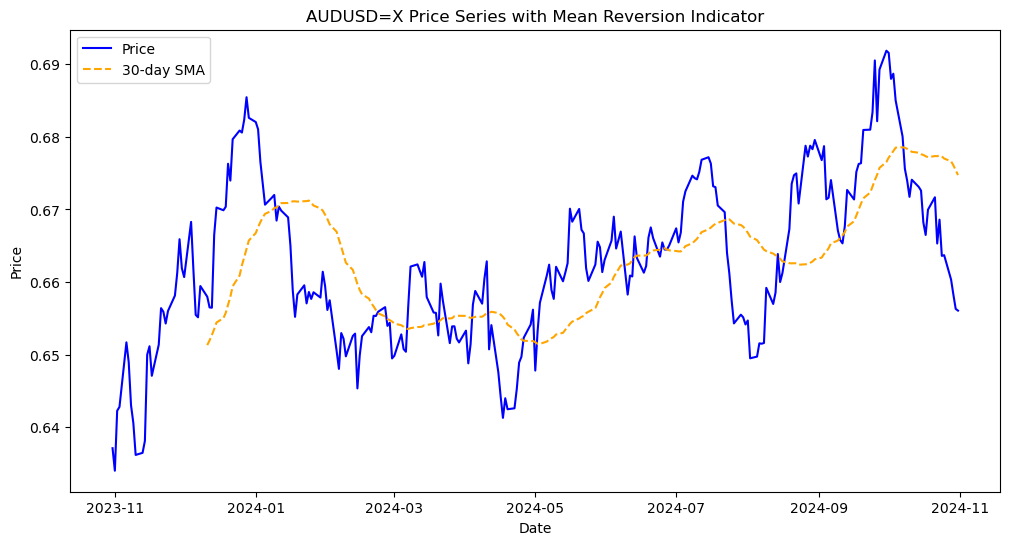

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


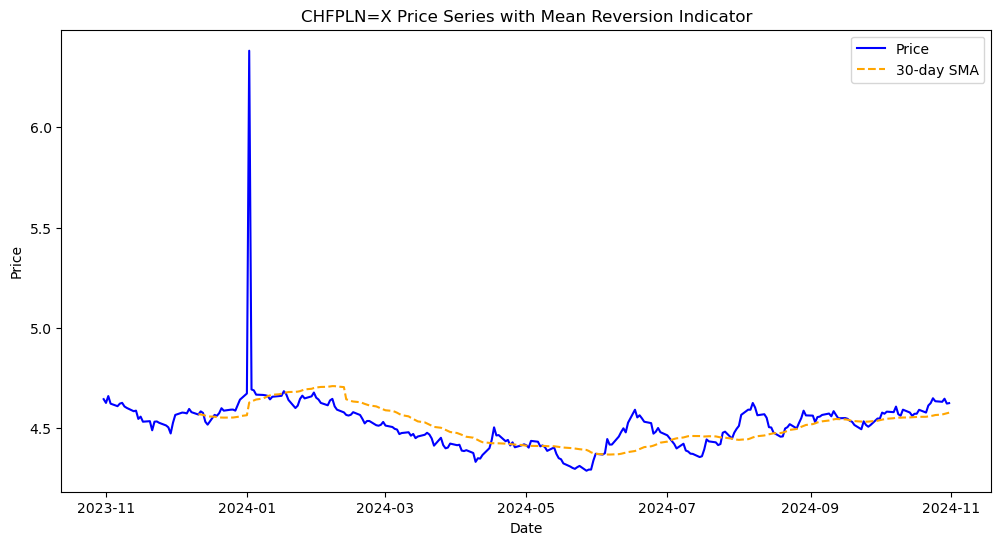

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


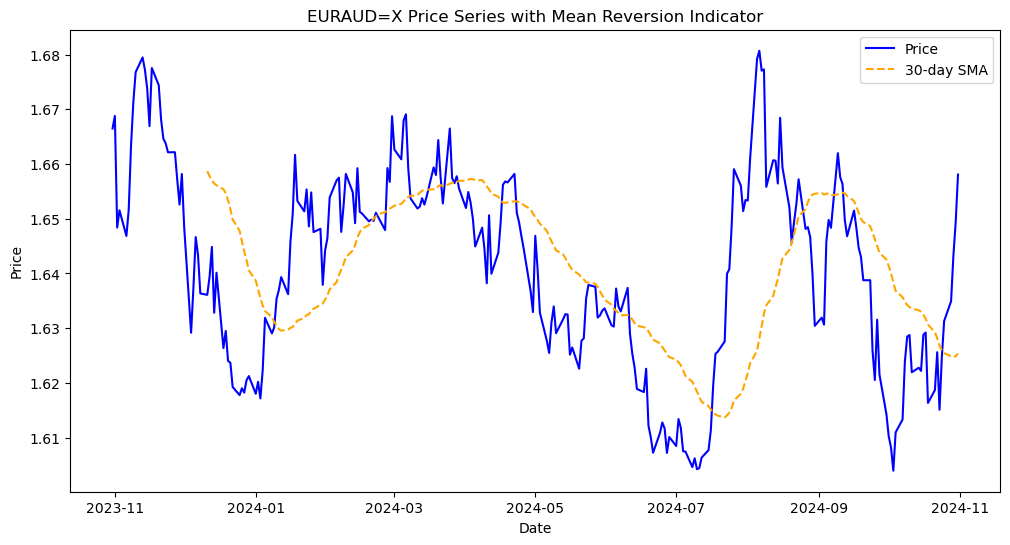

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Skipping EURCNH=X: sample size is too short to use selected regression component
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


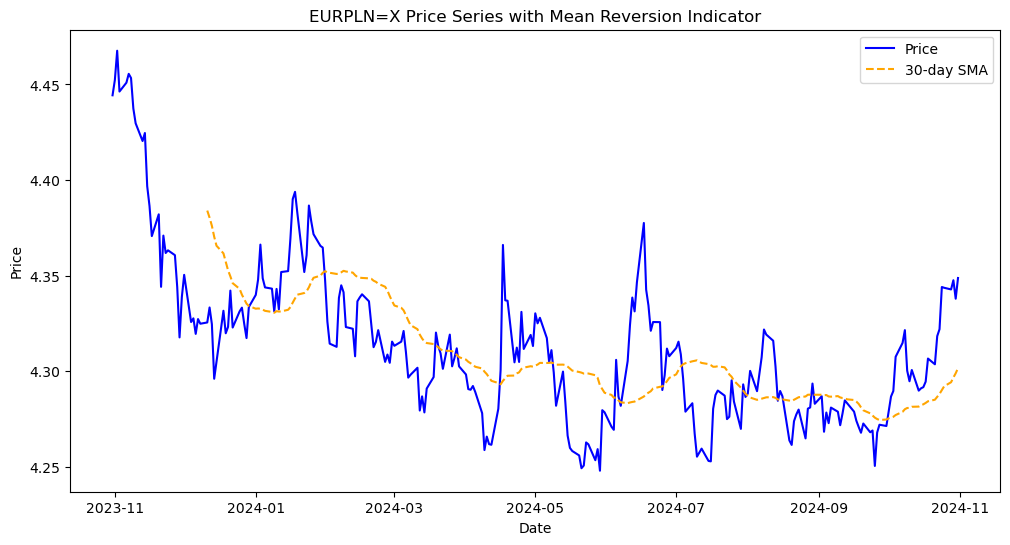

[*********************100%%**********************]  1 of 1 completed


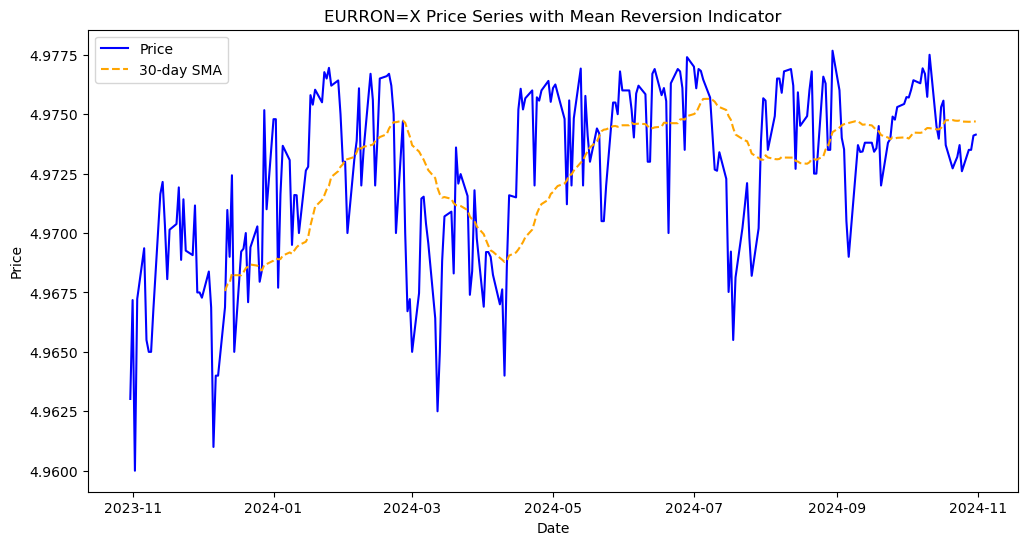

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


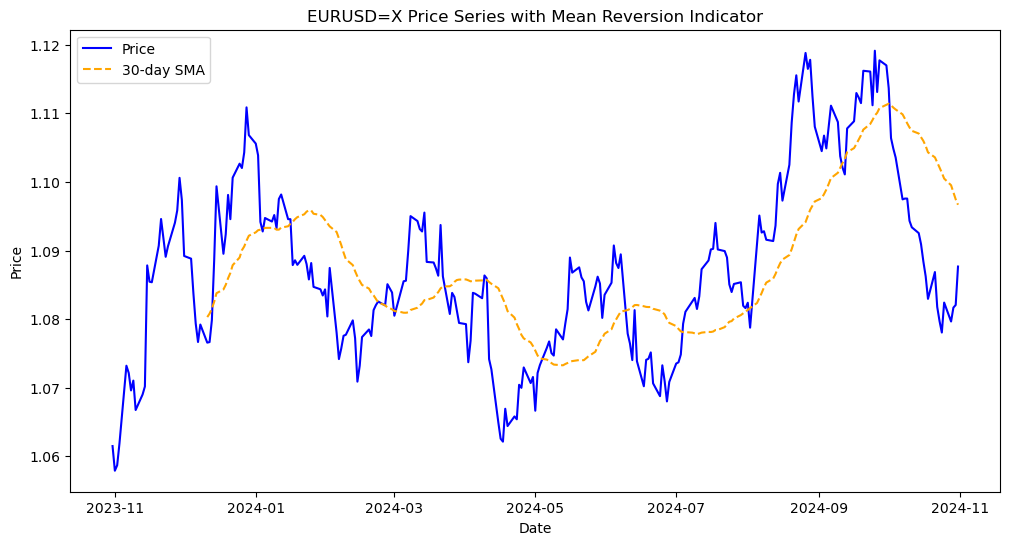

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


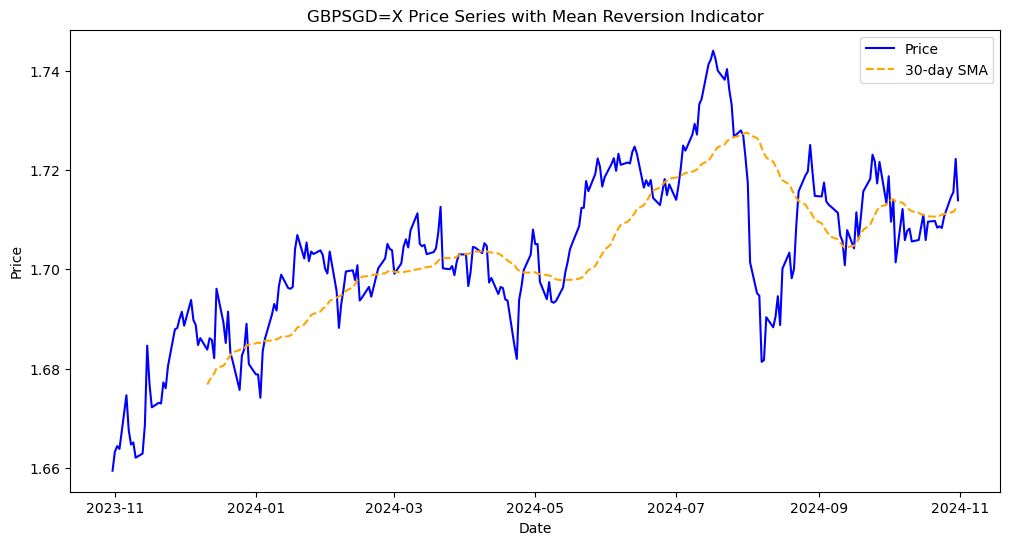

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


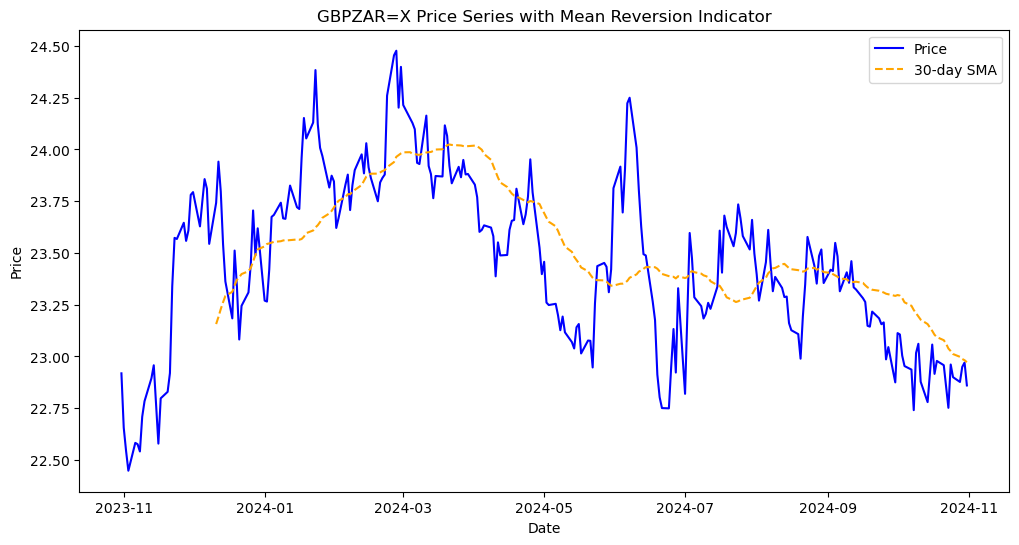

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


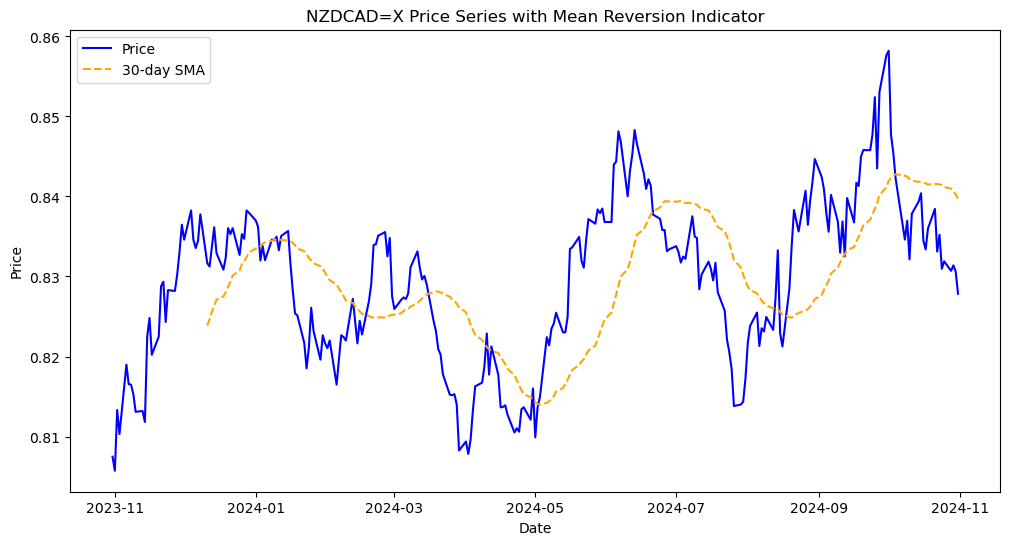

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
Skipping USDCNH=X: sample size is too short to use selected regression component
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


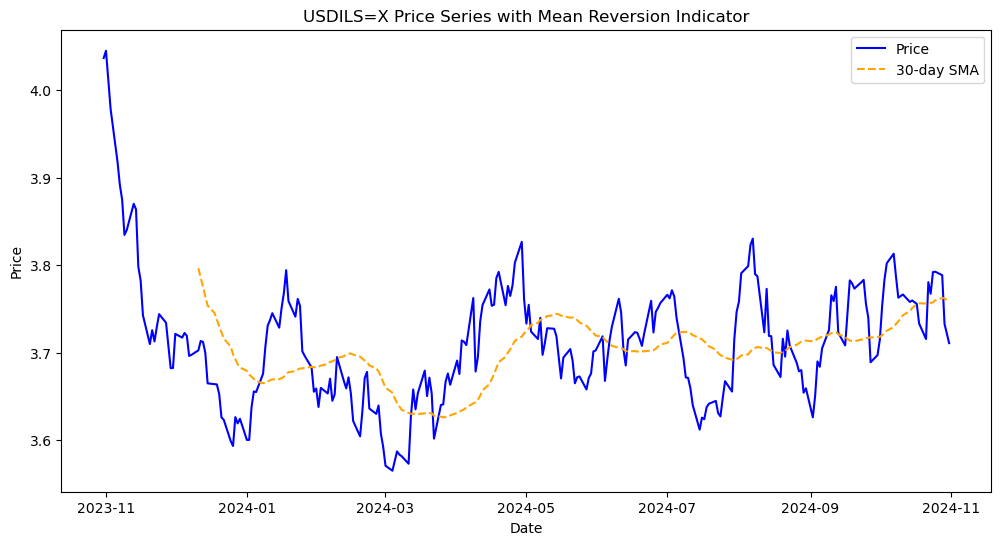

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


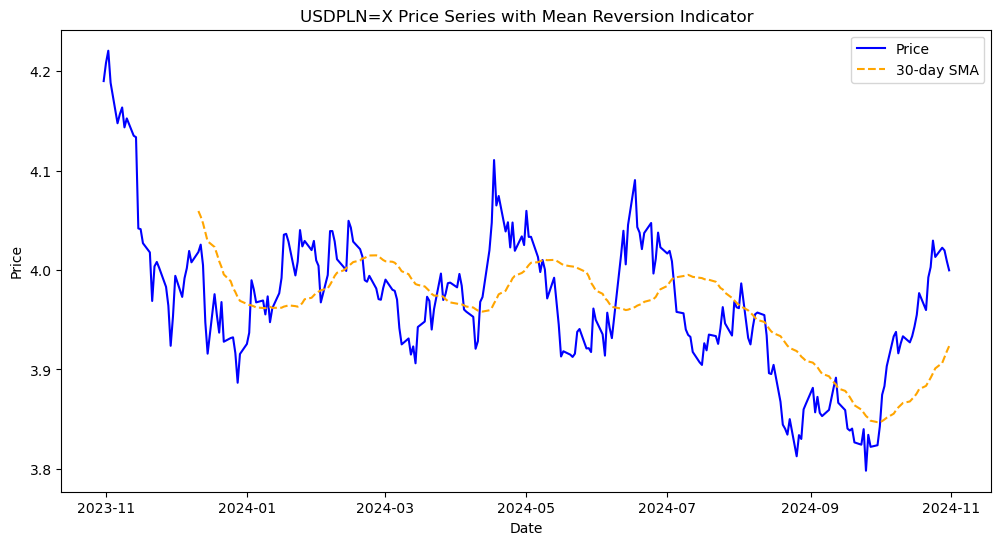

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


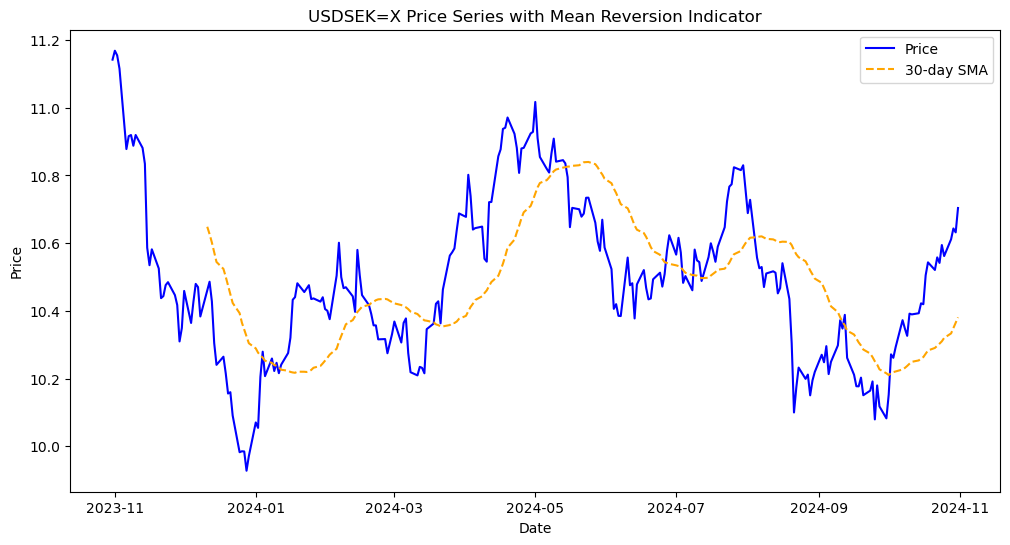

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed

Mean-Reverting FX Pairs (p < 0.10):
   Currency Pair  ADF Statistic   p-value  Half-Life (days)
0       CHFPLN=X      -3.324905  0.013801          1.369969
1       EURRON=X      -4.445435  0.000246          3.012929
2       USDILS=X      -4.751847  0.000067          7.648517
3       EURPLN=X      -3.562424  0.006521         10.187142
4       GBPZAR=X      -2.974601  0.037335         10.481286
5       USDPLN=X      -3.507546  0.007795         10.748637
6       NZDCAD=X      -3.150556  0.023031         11.176640
7       EURAUD=X      -2.906083  0.044645         11.493525
8       AUDUSD=X      -2.894051  0.046044         11.837708
9       EURUSD=X  

In [80]:
mean_reverting_pairs(fx_pairs)